In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from seaborn           import heatmap
import time
import time
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv("HR_Employee_Attrition_Data.csv")
print(df.shape)
print(df.columns)

(2940, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# EDA

In [10]:
# df.isnull().sum()

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# to count the number of employees that stayed and left the company
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

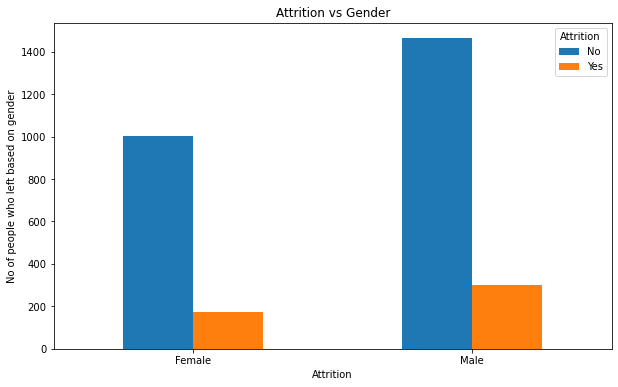

In [6]:
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.xticks(rotation=0)

Text(0, 0.5, 'No of people who left based on MaritalStatus')

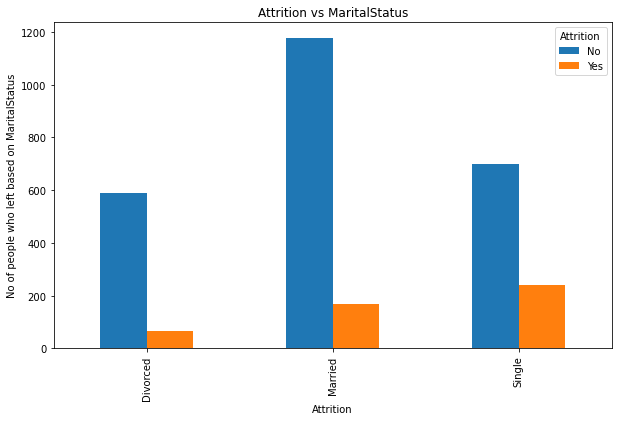

In [7]:
pd.crosstab(df['MaritalStatus'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs MaritalStatus")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on MaritalStatus")
# plt.xticks(rotation=0)

Text(0, 0.5, 'No of people who left based on Overtime')

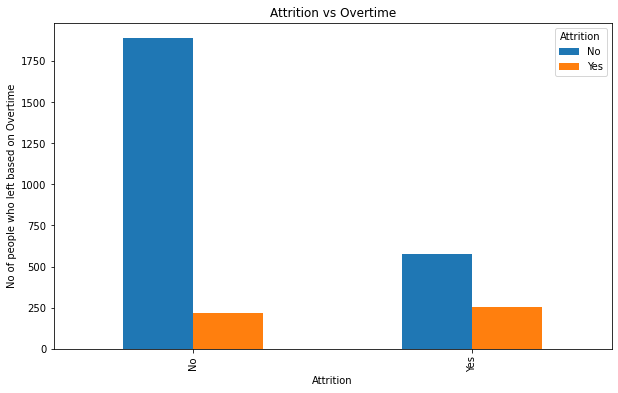

In [8]:
pd.crosstab(df['OverTime'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Overtime")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Overtime")
# plt.xticks(rotation=0)

Text(0, 0.5, 'No of people who left based on Department')

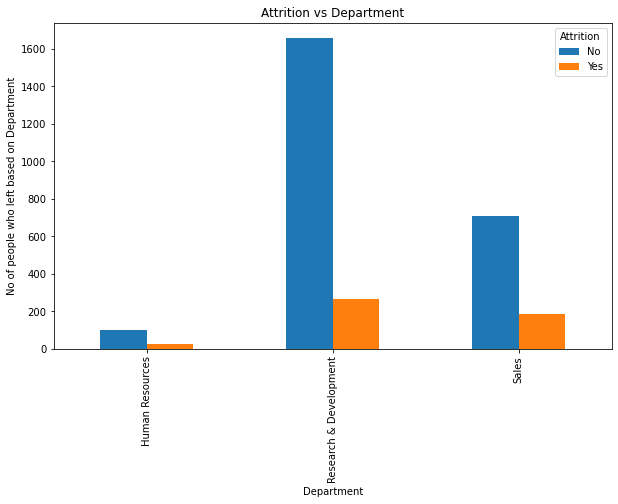

In [8]:
pd.crosstab(df['Department'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Department")
# plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Department")
# plt.xticks(rotation=0)

In [9]:
sns.barplot(x='Department', y='Gender', data = df, hue= 'Attrition')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

# defining X and y

In [9]:
df_hr=df

In [10]:
X=df_hr.drop(labels=['Attrition'], axis=1)
y=df_hr['Attrition']
names_index =X.columns

In [11]:
df_hr=df.drop(labels=['EmployeeNumber'], axis=1)

In [12]:
# X=df_hr.drop(labels=['Attrition'], axis=1)
# y=df_hr['Attrition']
# names_index =X.columns

# identify categorical variables

In [13]:
cat= df_hr.select_dtypes(include=['object']).columns.tolist()
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [14]:
for col in df_hr.columns:
    print(col, ':', len(df_hr[col].unique()), 'labels')     # to find the number of unique values in each column

Age : 43 labels
Attrition : 2 labels
BusinessTravel : 3 labels
DailyRate : 886 labels
Department : 3 labels
DistanceFromHome : 29 labels
Education : 5 labels
EducationField : 6 labels
EmployeeCount : 1 labels
EnvironmentSatisfaction : 4 labels
Gender : 2 labels
HourlyRate : 71 labels
JobInvolvement : 4 labels
JobLevel : 5 labels
JobRole : 9 labels
JobSatisfaction : 4 labels
MaritalStatus : 3 labels
MonthlyIncome : 1349 labels
MonthlyRate : 1427 labels
NumCompaniesWorked : 10 labels
Over18 : 1 labels
OverTime : 2 labels
PercentSalaryHike : 15 labels
PerformanceRating : 2 labels
RelationshipSatisfaction : 4 labels
StandardHours : 1 labels
StockOptionLevel : 4 labels
TotalWorkingYears : 40 labels
TrainingTimesLastYear : 7 labels
WorkLifeBalance : 4 labels
YearsAtCompany : 37 labels
YearsInCurrentRole : 19 labels
YearsSinceLastPromotion : 16 labels
YearsWithCurrManager : 18 labels


# Label encoding
### for varibels with 2 unique values

In [15]:
lab_col= ['Attrition', 'Gender','OverTime' 'PerformanceRating']

In [16]:
le=LabelEncoder()

In [17]:
df_hr['Attrition']=le.fit_transform(df_hr['Attrition'])
df_hr['Gender']=le.fit_transform(df_hr['Gender'])
df_hr['OverTime']=le.fit_transform(df_hr['OverTime'])
df_hr['PerformanceRating']=le.fit_transform(df_hr['PerformanceRating'])

In [18]:
# df_hr.head

# Onehot encoding
### for variables with more than 2 unique values

In [19]:
# number of new columms that will be formed after onehot encoding
pd.get_dummies(df_hr, drop_first=True).shape

(2940, 47)

In [20]:
# converting categorical data into dummy variables
dum_col=['BusinessTravel',
 'Department',
 'EducationField',
  'JobRole',
 'MaritalStatus',
 'Over18']
data= df_hr[dum_col]
# data
df_dummies= pd.get_dummies(data)
df_dummies

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2936,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2937,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
2938,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [21]:
# merging the dummy variables into the dataset
df_merged= pd.concat([df_hr, df_dummies], axis='columns')
df_merged.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_M

In [22]:
# drop the original categorical columns
df_fin = df_merged.drop(data, axis='columns')
df_fin.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare 

# train and test split

In [23]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_fin.drop(labels=['Attrition'], axis=1),
    df_fin['Attrition'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2058, 52), (882, 52))

# zero variance check

In [24]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [25]:
var_thres.get_support()


array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [26]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])


49

In [27]:
# number of zero variance columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))


3


In [28]:
for column in constant_columns:
    print(column)


EmployeeCount
StandardHours
Over18_Y


In [29]:
X_train= X_train.drop(constant_columns,axis=1)
X_test= X_test.drop(constant_columns,axis=1)

# checking multicollinearity

In [30]:
corrmat= df_hr.corr()
# corrmat


In [31]:
# to select the highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(df_hr, 0.7)
len(set(corr_features))

5

In [33]:
corr_features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [34]:
# dropping the correlated features
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

# Correlation of Attrition with dependent variables

Index(['Attrition', 'OverTime', 'DistanceFromHome', 'NumCompaniesWorked',
       'Gender', 'MonthlyRate', 'PerformanceRating', 'HourlyRate',
       'PercentSalaryHike', 'Education'],
      dtype='object')


<AxesSubplot:>

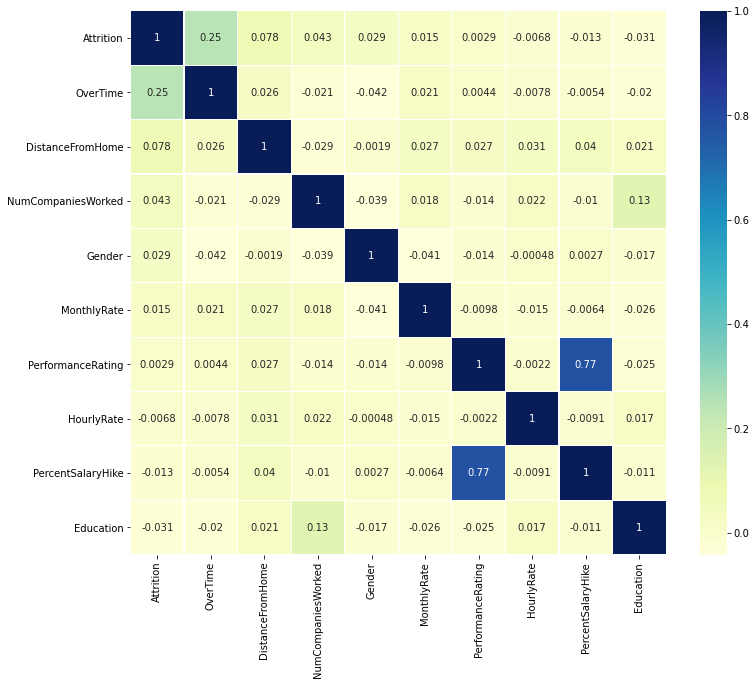

In [35]:
k = 10
  
cols = corrmat.nlargest(k,'Attrition')['Attrition'].index
print(cols)
cm = np.corrcoef(df_hr[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,
            linewidths = 0.1, yticklabels = cols.values, 
                              xticklabels = cols.values)

# standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
model_dt = DecisionTreeClassifier()

# Hyperparameter optimization for decision tree

In [43]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [20,25,30,35,40,45,50],
              'min_samples_split':[4,8,12,16],
              'min_samples_leaf': [1,2,3,4,5],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(X_train, y_train)
                   
print('Best Parameters using grid search: \n', cv_dt.best_params_)
                   
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 4}
Time taken in grid search:  31.72


In [44]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth= 40, min_samples_leaf= 1, min_samples_split= 4)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_prob_dt=  model_dt.predict_proba(X_test)[:,1]


In [45]:
accuracy= accuracy_score(y_test, y_pred_dt)
accuracy

0.9569160997732427

# Confusion matrix_decision tree

In [46]:
def create_conf_mat(y_test, y_pred_dt):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(y_pred_dt.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_dt.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = y_pred_dt)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

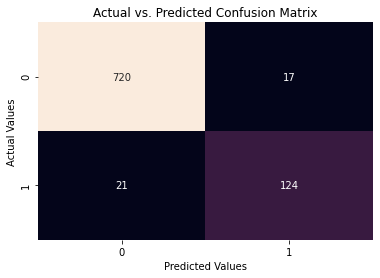

In [47]:
conf_mat = create_conf_mat(y_test, y_pred_dt)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()

# Hyperparameter optimization for Random Forest

In [49]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,15,20,25,30,40],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2','None'],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.92372958 0.92081222 0.9227516         nan 0.94170969 0.94170969
 0.94268293        nan 0.94268293 0.94267819 0.94268293        nan
 0.943166   0.943166   0.94219512        nan 0.94559318 0.943166
 0.94365143        nan 0.94413924 0.94219275 0.94122425        nan
 0.92275633 0.9232323  0.91740706        nan 0.94365617 0.94121951
 0.94219275        nan 0.94316363 0.94365143 0.943166          nan
 0.94268056 0.94316363 0.94462467        nan 0.9436538  0.94510774
 0.94170969        nan 0.94268056 0.94462467 0.94219512        nan]
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto'}
Time taken in grid search:  87.63


In [50]:
model_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 30)

RandomForestClassifier(max_depth=30)

# OOB score

In [51]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 101
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(X_train,y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

In [52]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

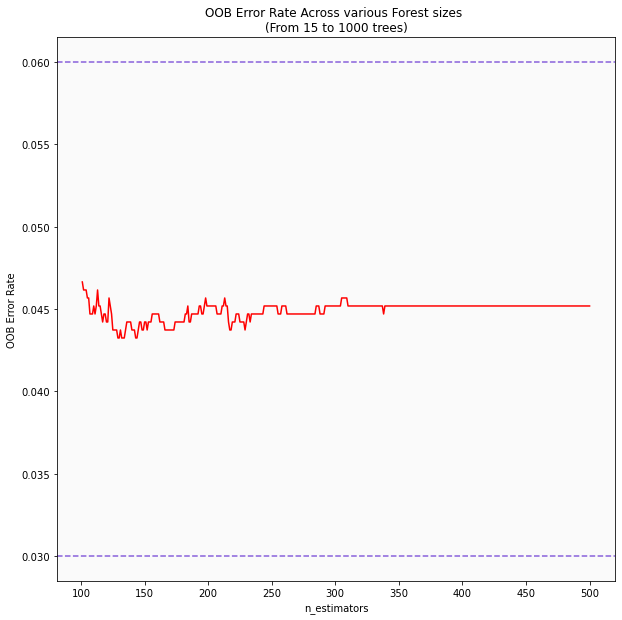

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.06, color='#875FDB',linestyle='--')
plt.axhline(0.03, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [54]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.04519


In [55]:
# Refine the tree via OOB Output
model_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=30, n_estimators=400)

In [56]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=400)

In [57]:
predictions_rf = model_rf.predict(X_test)

In [58]:
accuracy_rf = accuracy_score(y_test, predictions_rf)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.964


# Confusion matrix for Random Forest

In [59]:
def create_conf_mat(y_test, predictions_rf):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions_rf.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions_rf.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions_rf)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

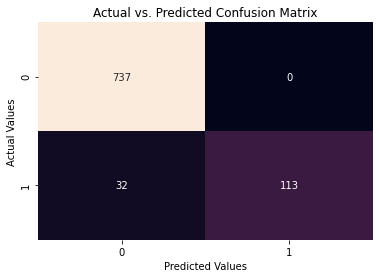

In [60]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [61]:
pred_prob_rf = model_rf.predict_proba(X_test)[:,1]


In [63]:
dx= ['No', 'Yes']

In [64]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions_rf, 
            y_test, 
            target_names = dx))

In [65]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       1.00      0.96      0.98       769
         Yes       0.78      1.00      0.88       113

    accuracy                           0.96       882
   macro avg       0.89      0.98      0.93       882
weighted avg       0.97      0.96      0.97       882



# Comparison of two models

In [69]:
pred_prob_dt = model_dt.predict_proba(X_test)[:,1]
pred_prob_rf = model_rf.predict_proba(X_test)[:,1]


In [71]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_prob_dt,pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_prob_rf,pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# print(tpr_rf)

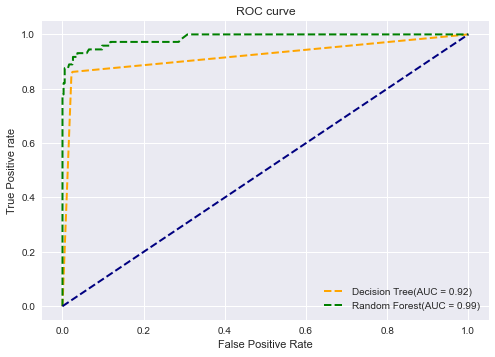

In [72]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure()
lw = 2
# plot roc curves
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', 
        lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green', 
        lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();